In [1]:
import pandas as pd
import numpy as np

# Load CSV data into a DataFrame
df = pd.read_csv('engineering_student_data.csv')

# Importing the Data Frame
We import the data and monitor the inserted DF for any dirty data like null values, invalid inputs, etc.

In [2]:
df.head(10)

,student_ID,English_Proficiency,Reading_Comprehension,Science_Process_Skills,Quantitative_Skills,Abstract_Thinking Skills,OAPR,Vocabulary,Knowledge_and_Comprehension,Abstract_Reasoning,Computational_Skill,Logical_Reasoning,Percentile_Rank,Took_Board_Exam,Is_passed,Is_Regular
0,1,44.05,61.11,80.93,79.96,72.90,66.95,12,16,8,13,7,46.48,1.0,1.0,1
1,2,87.60,87.40,85.06,92.22,95.65,92.51,14,18,6,13,11,69.14,0.0,0.0,1
2,3,89.71,77.12,93.41,89.31,53.29,90.13,14,16,5,12,11,54.49,1.0,1.0,1
3,4,61.05,30.03,44.12,53.82,95.65,62.48,11,16,12,13,10,69.14,1.0,1.0,1
4,5,89.71,92.88,96.28,94.54,98.34,98.34,12,20,12,15,7,81.04,1.0,1.0,1
5,6,98.17,94.82,98.58,99.34,87.72,99.23,17,20,9,26,12,99.13,1.0,1.0,1
6,7,97.39,77.12,98.58,99.61,87.72,98.81,16,19,14,20,10,97.76,1.0,1.0,1
7,8,91.83,66.85,93.41,95.71,53.29,92.03,13,15,4,15,9,46.48,1.0,1.0,1
8,9,82.02,87.40,91.93,93.38,72.90,89.65,13,16,4,12,9,37.76,1.0,1.0,1
9,10,98.41,92.88,94.84,94.54,98.34,98.43,14,18,13,9,12,81.04,1.0,1.0,1


In [3]:
df.dtypes

student_ID                       int64
English_Proficiency            float64
Reading_Comprehension          float64
Science_Process_Skills         float64
Quantitative_Skills            float64
Abstract_Thinking Skills       float64
OAPR                           float64
Vocabulary                       int64
Knowledge_and_Comprehension      int64
Abstract_Reasoning               int64
Computational_Skill              int64
Logical_Reasoning                int64
Percentile_Rank                float64
Took_Board_Exam                float64
Is_passed                      float64
Is_Regular                       int64
dtype: object

In [4]:
# See how many null values we have
null_count = df.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 15


In [5]:
# See how many student took the board exam, v. those who did not
board_taker = (df['Took_Board_Exam']==1).sum()
print('Number of Board Taker/s:', board_taker)


board_misser = (df['Took_Board_Exam']==0).sum()
print('Number of Board Misser/s:', board_misser)

Number of Board Taker/s: 30
Number of Board Misser/s: 11


# Data Preprocessing
As we see, we not only have null (NaN) values, we also have students who did not take the board exam. We believe that these will affect the ML's ability to predict accurately. So we need to drop those rows.

In [6]:
# Dropping NaN values first
dropna_df = df.dropna()

In [7]:
# Checking for remaining outliers
dropna_df.head(10)

,student_ID,English_Proficiency,Reading_Comprehension,Science_Process_Skills,Quantitative_Skills,Abstract_Thinking Skills,OAPR,Vocabulary,Knowledge_and_Comprehension,Abstract_Reasoning,Computational_Skill,Logical_Reasoning,Percentile_Rank,Took_Board_Exam,Is_passed,Is_Regular
0,1,44.05,61.11,80.93,79.96,72.90,66.95,12,16,8,13,7,46.48,1.0,1.0,1
1,2,87.60,87.40,85.06,92.22,95.65,92.51,14,18,6,13,11,69.14,0.0,0.0,1
2,3,89.71,77.12,93.41,89.31,53.29,90.13,14,16,5,12,11,54.49,1.0,1.0,1
3,4,61.05,30.03,44.12,53.82,95.65,62.48,11,16,12,13,10,69.14,1.0,1.0,1
4,5,89.71,92.88,96.28,94.54,98.34,98.34,12,20,12,15,7,81.04,1.0,1.0,1
5,6,98.17,94.82,98.58,99.34,87.72,99.23,17,20,9,26,12,99.13,1.0,1.0,1
6,7,97.39,77.12,98.58,99.61,87.72,98.81,16,19,14,20,10,97.76,1.0,1.0,1
7,8,91.83,66.85,93.41,95.71,53.29,92.03,13,15,4,15,9,46.48,1.0,1.0,1
8,9,82.02,87.40,91.93,93.38,72.90,89.65,13,16,4,12,9,37.76,1.0,1.0,1
9,10,98.41,92.88,94.84,94.54,98.34,98.43,14,18,13,9,12,81.04,1.0,1.0,1


In [8]:
# See how many null values we still have
null_count = dropna_df.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 0


In [9]:
dropna_df.dtypes

student_ID                       int64
English_Proficiency            float64
Reading_Comprehension          float64
Science_Process_Skills         float64
Quantitative_Skills            float64
Abstract_Thinking Skills       float64
OAPR                           float64
Vocabulary                       int64
Knowledge_and_Comprehension      int64
Abstract_Reasoning               int64
Computational_Skill              int64
Logical_Reasoning                int64
Percentile_Rank                float64
Took_Board_Exam                float64
Is_passed                      float64
Is_Regular                       int64
dtype: object

In [10]:
# Dropping rows where student did not take the board exam (Took_Board_Exam == 0)
clean_df = dropna_df[dropna_df['Took_Board_Exam'] == 1]

In [11]:
# Making a separate df for training the data. We don't need the average percentage of both
# CET and EAT, and whether the student took the exam. Therefore we drop those columns.

train_df = clean_df.copy()
columns_to_drop = ['OAPR', 'Percentile_Rank', 'Took_Board_Exam']
train_df.drop(columns_to_drop, axis=1, inplace=True)

In [12]:
train_df.head(10)

,student_ID,English_Proficiency,Reading_Comprehension,Science_Process_Skills,Quantitative_Skills,Abstract_Thinking Skills,Vocabulary,Knowledge_and_Comprehension,Abstract_Reasoning,Computational_Skill,Logical_Reasoning,Is_passed,Is_Regular
0,1,44.05,61.11,80.93,79.96,72.90,12,16,8,13,7,1.0,1
2,3,89.71,77.12,93.41,89.31,53.29,14,16,5,12,11,1.0,1
3,4,61.05,30.03,44.12,53.82,95.65,11,16,12,13,10,1.0,1
4,5,89.71,92.88,96.28,94.54,98.34,12,20,12,15,7,1.0,1
5,6,98.17,94.82,98.58,99.34,87.72,17,20,9,26,12,1.0,1
6,7,97.39,77.12,98.58,99.61,87.72,16,19,14,20,10,1.0,1
7,8,91.83,66.85,93.41,95.71,53.29,13,15,4,15,9,1.0,1
8,9,82.02,87.40,91.93,93.38,72.90,13,16,4,12,9,1.0,1
9,10,98.41,92.88,94.84,94.54,98.34,14,18,13,9,12,1.0,1
10,11,83.47,77.12,85.06,96.87,53.29,14,13,9,15,10,1.0,1


# Splitting the data
This is where we'll start building the Regression algorithm. But first, we need to split the data for testing the accuracy before augmenting the data.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Dropping student_ID
train_df.drop(columns=['student_ID'], axis=1, inplace=True)

In [15]:
train_df_augmentation, train_df_unseen = train_test_split(train_df, test_size=6, random_state=42)

In [16]:
# checking if the split was done correctly
train_df_augmentation

,English_Proficiency,Reading_Comprehension,Science_Process_Skills,Quantitative_Skills,Abstract_Thinking Skills,Vocabulary,Knowledge_and_Comprehension,Abstract_Reasoning,Computational_Skill,Logical_Reasoning,Is_passed,Is_Regular
32,87.60,92.88,51.68,53.82,79.78,12,16,6,13,8,1.0,0
27,70.75,54.75,80.93,53.82,53.29,12,18,8,5,6,0.0,0
13,31.88,66.85,93.41,53.82,83.75,13,14,7,13,11,1.0,1
0,44.05,61.11,80.93,79.96,72.90,12,16,8,13,7,1.0,1
5,98.17,94.82,98.58,99.34,87.72,17,20,9,26,12,1.0,1
17,80.58,48.40,51.68,75.28,63.10,11,15,7,15,8,1.0,1
6,97.39,77.12,98.58,99.61,87.72,16,19,14,20,10,1.0,1
14,68.50,98.70,66.81,53.82,83.75,10,20,11,9,10,1.0,1
12,76.83,54.75,76.79,89.31,91.68,12,18,10,17,13,1.0,1
25,89.71,77.12,91.97,53.82,72.90,12,16,9,11,8,0.0,0


In [17]:
features = ['English_Proficiency','Reading_Comprehension','Science_Process_Skills','Quantitative_Skills','Abstract_Thinking Skills','Vocabulary','Knowledge_and_Comprehension','Abstract_Reasoning','Computational_Skill','Logical_Reasoning','Is_Regular']
X = train_df[features]
y = train_df['Is_passed']

In [49]:
# [DONT USE] Of the 30 un-augmented data, we'll be extracting 6 row of data to serve as unseen data for testing later
# [DONT RUN] X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=6, random_state=42)

In [18]:
# Augmenting the student data
target_rows = 450

In [19]:
# Define the columns to be augmented (excluding 'student_id')
numeric_columns = train_df_augmentation.columns[1:]

In [20]:
# Define the range for jittering
jitter_range_cet = 0.1  # Jitter range of CET
jitter_range_eat = 1    # Jitter range of EAT

# Initialize an empty list to store augmented data
augmented_data = []

# Jittering function for decimal values
def jitter_decimal(value, jitter_range):
    return value + np.random.uniform(-jitter_range, jitter_range)

# Jittering function for whole number values
def jitter_whole_number(value, jitter_range):
    return value + np.random.randint(-jitter_range, jitter_range + 1)

# Jittering function for boolean values (limited to 0 and 1)
def jitter_boolean(value):
    return int(value) ^ np.random.randint(2)  # XOR with 0 or 1 to toggle between 0 and 1

# Augment data until reaching the target number of rows
while len(augmented_data) < target_rows:
    # Randomly select a row from the original data
    original_row = train_df_augmentation.iloc[np.random.randint(0, len(train_df_augmentation))]

    # Apply jittering to each numeric column
    augmented_row = original_row.copy()
    for col in numeric_columns:
        # if col in ['Vocabulary', 'Knowledge_and_Comprehenshion', 'Abstract_Reasoning', 'Computatiol_Skill', 'Logical_Reasoning']:
            # augmented_row[col] = jitter_whole_number(augmented_row[col], jitter_range_eat)
        # elif col in ['English_Proficiency', 'Reading_Comprehenshion', 'Science_Process_Skills', 'Quantitative_Skills', 'Abstract_Thinking Skills']:
            # augmented_row[col] = jitter_decimal(augmented_row[col], jitter_range_cet)
        if col in ['Took_Board_Exam', 'Is_passed', 'Is_Regular']:
            augmented_row[col] = jitter_boolean(augmented_row[col])
        else:
            augmented_row[col] = jitter_decimal(augmented_row[col], jitter_range_cet)  # Default to decimal jittering for other columns

    # Append the augmented row to the list
    augmented_data.append(augmented_row)

# Create a DataFrame from the augmented data
augmented_df = pd.DataFrame(augmented_data, columns=train_df_augmentation.columns)

# Benchmarking other algorithms
Now that we augmented the dataset, let's build our model. In order to determine which model will suite our use case, we need
to install 3 algorithms. 1.) Random Forest Regressor, 2. ) Gradient Boosting Regressor, and 3.) Support Vector Regression.

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# First, training with random forest.
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)

In [24]:
# Second, training with gb regression
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)
gb_predictions = gb_regressor.predict(X_test)

In [25]:
# Thirdly. training with svr.
svr_regressor = SVR()
svr_regressor.fit(X_train, y_train)
svr_predictions = svr_regressor.predict(X_test)

Time to check the accuracy of these three models.

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score

### Accuracy test for RandomForestRegressor

In [27]:
# Calculate Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, rf_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse_rf = mean_squared_error(y_test, rf_predictions, squared=False)

# Calculate R-squared (R²)
r_squared_rf = r2_score(y_test, rf_predictions)

print("Mean Absolute Error:", mae_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R-squared:", r_squared_rf)

Mean Absolute Error: 0.12333333333333334
Root Mean Squared Error: 0.20607442021431643
R-squared: 0.8089


### Accuracy test for GradientBoostingRegressor

In [28]:
# Calculate Mean Absolute Error (MAE)
mae_gb = mean_absolute_error(y_test, gb_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse_gb = mean_squared_error(y_test, gb_predictions, squared=False)

# Calculate R-squared (R²)
r_squared_gb = r2_score(y_test, gb_predictions)

print("Mean Absolute Error:", mae_gb)
print("Root Mean Squared Error:", rmse_gb)
print("R-squared:", r_squared_gb)

Mean Absolute Error: 0.22182214670949452
Root Mean Squared Error: 0.43001831683158803
R-squared: 0.16787911235197595


### Accuracy test for SVR

In [29]:
# Calculate Mean Absolute Error (MAE)
mae_svr = mean_absolute_error(y_test, svr_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse_svr = mean_squared_error(y_test, svr_predictions, squared=False)

# Calculate R-squared (R²)
r_squared_svr = r2_score(y_test, svr_predictions)

print("Mean Absolute Error:", mae_svr)
print("Root Mean Squared Error:", rmse_svr)
print("R-squared:", r_squared_svr)

Mean Absolute Error: 0.3371631181313739
Root Mean Squared Error: 0.5344817538129921
R-squared: -0.2855183532155534


# Feature Importance
Here we will see which feature has a bigger weight in predicting whether a student has a high probability of passing.

In [ ]:
import matplotlib.pyplot as plt

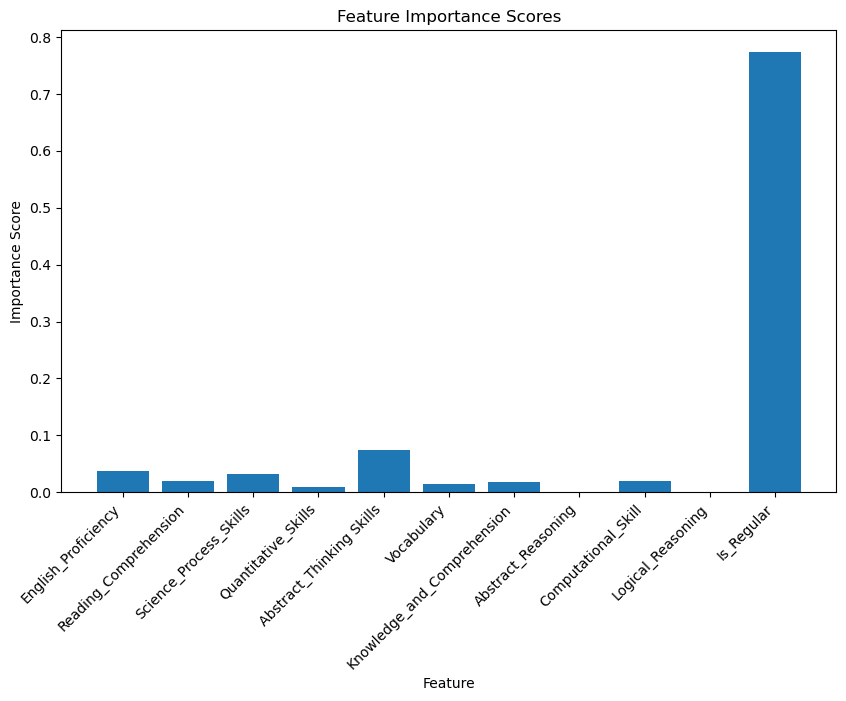

In [34]:
# Feature importance in random forest

feature_importance = rf_regressor.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Random Forest Regressor)')
plt.xticks(rotation=45, ha='right')
plt.show()

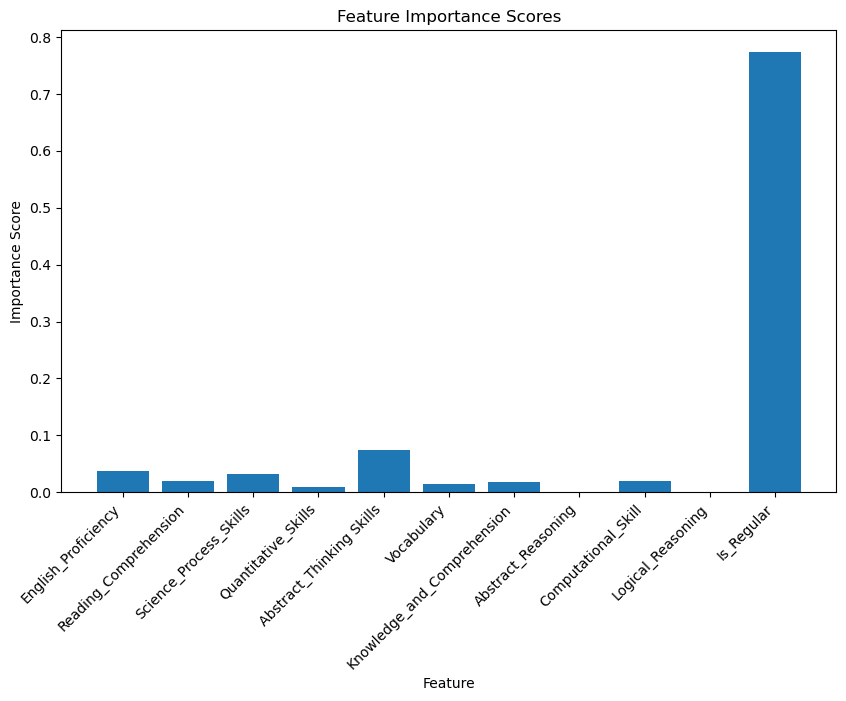

In [ ]:
# Feature importance in gradient boosting

feature_importance = gb_regressor.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (Gradient Boosting Regressor)')
plt.xticks(rotation=45, ha='right')
plt.show()

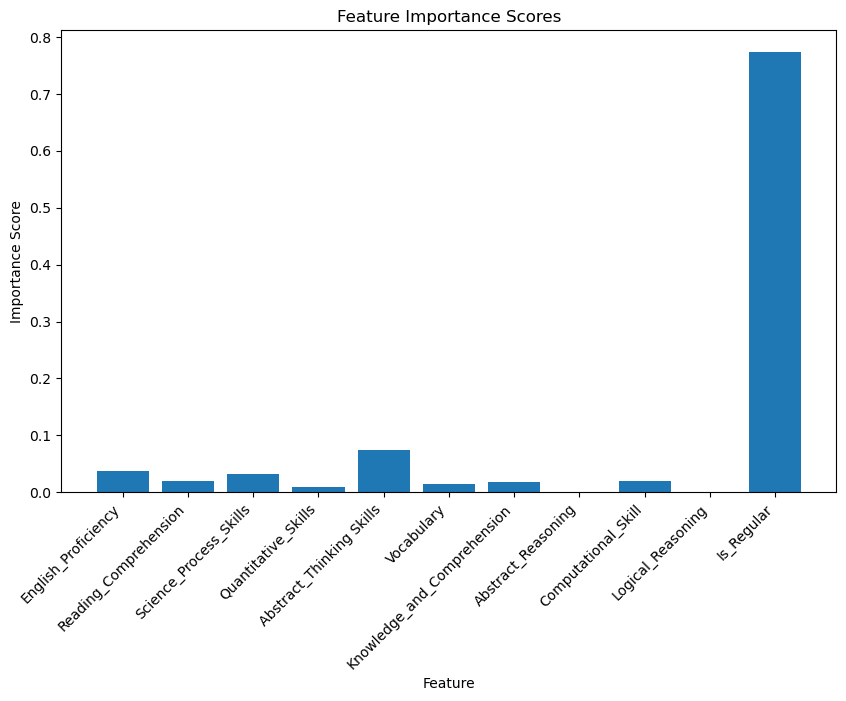

In [ ]:
# Feature importance in svr

feature_importance = svr_regressor.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores (SVR)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Verdict
We will be using RandomForestRegressor because of its low MAE and RMSE score, and a high R² score.
The next best model is GradientBoostingRegressor.
But the worst performer is SVR because of its really low R² score.

In [30]:
X_unseen = train_df_unseen.drop(columns=['Is_passed'])
y_unseen = train_df_unseen['Is_passed']

In [31]:
unseen_predictions = rf_regressor.predict(X_unseen)

In [32]:
# Calculate Mean Absolute Error (MAE) on the unseen data
mae_unseen = mean_absolute_error(y_unseen, unseen_predictions)

# Calculate R-squared (R²) on the unseen data
r_squared_unseen = r2_score(y_unseen, unseen_predictions)

print("Mean Absolute Error on Unseen Data:", mae_unseen)
print("R-squared on Unseen Data:", r_squared_unseen)

Mean Absolute Error on Unseen Data: 0.12333333333333334
R-squared on Unseen Data: 0.8089


# Dump model as Pickle
Now that we build the Random Forest Model, we need to dump it for the python app to use it.

In [33]:
import pickle
pickle.dump(rf_regressor, open('rf_student_grade_model.pkl', 'wb'))